In [4]:
import statsmodels

In [5]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

In [6]:
#Вспомогательная функция для подсчета доверительного интервала
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
# 
def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>


В маркетинговых исследованиях обычно применяется 95%-й доверительный уровень. Ему соответствует значение Z = 1,96.
https://scanmarket.ru/blog/vyborka-razmer-ne-glavnoe-ili-glavnoe?ysclid=ldkdt8eji6177552975

<div class="alert alert-info">
    
Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приближенно равно 15. Пусть погрешность измерений $\Delta$ = 5. Таким образом, обозначим стандартное отклонение $\sigma$ = 15 и квантиль нормального распределения Z = 1,96.

</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [7]:
sigma = 15  # Стандартное отклонение уже дано в квадрате, так что берем корень
# В маркетинговых исследованиях обычно применяется 95%-й доверительный уровень. Ему соответствует значение Z = 1,96.
# https://scanmarket.ru/blog/vyborka-razmer-ne-glavnoe-ili-glavnoe?ysclid=ldkdt8eji6177552975
Z = 1.96  #  %   # Квантиль нормального распределения. 
Delta = 3 #%         #Погрешность

In [8]:
N = int(((sigma*Z)/Delta)**2)
N

96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

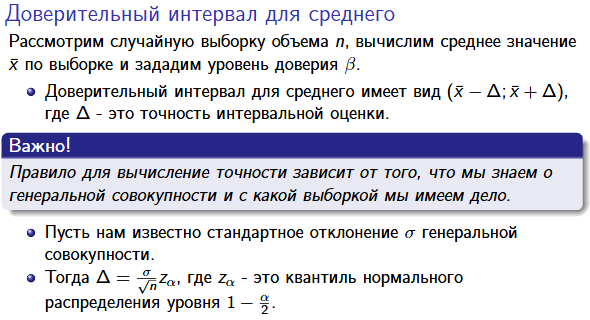

In [9]:
### Ваши код/вычисления...
n = 25
x_mean = 130
sigma = 15
Za = 2.326 # значение из таблицы для двух хвостов
delta = (sigma / np.sqrt(n)) *  Za 
#L = ....  #Запишите в эту переменную ваш высчитанный ответ!
L = x_mean+2 * delta
round(L)

144.0

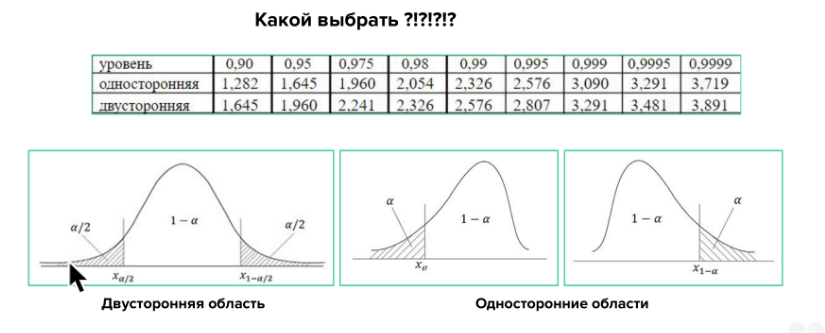

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

По Z-тесту:
z_value: 28.313635693327363 _pvalue:  2.348119675125972e-176
По тесту Стьюдента:
t_value: 28.313635693327363 _pvalue:  4.013049237709119e-176


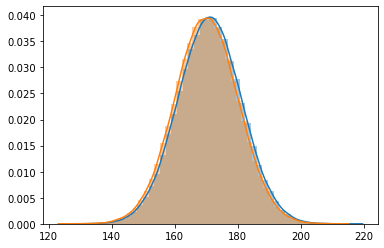

In [22]:
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150_000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150_000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

### Ваш код...
#Идея:
#https://python-school.ru/blog/python-for-statissticians/?ysclid=ldlwhkw1tr565426242

### Ваш код...
tvalueZ, pvalueZ = statsmodels.stats.weightstats.ztest(mens, womens)
print ('По Z-тесту:')
print('z_value:',tvalueZ, '_pvalue: ',pvalueZ)
tvalueSt, pvalueSt = stats.ttest_ind(mens, womens)
print ('По тесту Стьюдента:')
print('t_value:',tvalueSt, '_pvalue: ',pvalueSt)

sns.distplot(mens)
sns.distplot(womens)
#plt.hist(mens, bins=50);
#plt.hist(womens, bins=50);

Мы получаем **малое** значение p, чем $\alpha$ `= 0.001`. и, таким образом, мы отклоняем нулевую гипотезу (H0- что средние равны), то есть - средние значения двух распределений различны и это различие статистически значимо.

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

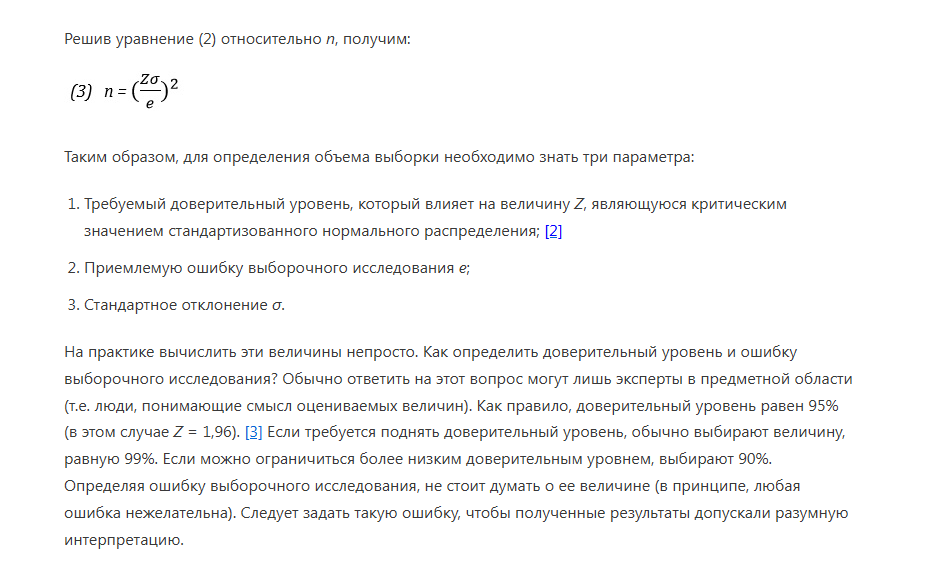

In [ ]:
### Ваш код...
Z = 1.96
sigma = 150
Delta = 50
n = (Z*sigma/Delta)**2
print(f'Объем необходимой выборки для исследования среднего чека за кофе в случайном городе :{round(n)}')

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [69]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
print('Таблица ответов:')
display(observations)


chi, pval, dof, exp = stats.chi2_contingency(observations.values) #Критерий Пирсона (хи квадрат)
significance = 0.05
print ('Критерий Пирсона (хи квадрат):', end='')
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевую гипотезу и принимаем H1.
            Они не независимы. Волшебник умеет предсказывать погоду.""" % (significance))
    print('Это правда эксперт!')
else:
    print("""На %.2f уровене значимости, мы принимаем нулевую гипотезу.  
            Они (ответы) независимы. Волшебник-шарлатан.""" % (significance))

Таблица ответов:


,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


Критерий Пирсона (хи квадрат):p-value=0.353969, significance=0.05

На 0.05 уровене значимости, мы принимаем нулевую гипотезу.  
            Они (ответы) независимы. Волшебник-шарлатан.


In [71]:
import scipy.stats as stats
# Учтите, что у стат. тестов, 
# в том числе и точного теста Фишера под нулевой гипотезой подразумевается 
# случайность/отсутствие эффекта
significance = 0.05
oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.
print ('Критерий Фишера:', end='')
print(f'oddsratio = {oddsratio:.2f}, pvalue = {pvalue:.2f}, заданный уровень значимости: {significance:.2f}')
### Ваш код...
if pval < significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.\
Ответы волшебника не случайны.')
    print('Это правда эксперт в погоде!')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.\
Ответы волшебника случайны.')
    print('Волшебник-шарлатан!')

Критерий Фишера:oddsratio = 0.58, pvalue = 0.35, заданный уровень значимости: 0.05
На 0.05 уровене значимости, мы не можем отвергнуть нулевую гипотезу.Ответы волшебника случайны.
Волшебник-шарлатан!


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...

low, value_, high = mean_confidence_interval(data, confidence=0.9)
print(f'Нижняя граница:{low:.2f}')
print(f'Значение:{value_:.2f}')
print(f'Верхняя граница:{high:.2f}')


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

**Тест Колмогорова-Смирнова**

Данный критерий позволяет оценить существенность различий между двумя выборками. Его применение возможно также для сравнения эмпирического распределения с теоретическим.

Объёмы рассматриваемых выборок должны быть достаточно большими: ≥50,≥50. Для использования теста выборки должны быть представлены в виде частотного распределения, при этомчисло категорий должно быть небольшим (до 7-9). Идеально подходит для нашего случая.

Нулевая гипотеза **Ho** -*различия между двумя распределениями недостоверны*.

**Тест Манна-Уитни:**

Нулевая гипотеза критерия **Ho** -  *распределения обеих выборок идентичны*. Вполне приличный тест для нашего кейса.

Размерности выборок:

Выборка А: 112
Выборка B: 95

Тест Колмогорова-Смирнова:

Value = 0.58, pvalue = 0.00, заданный уровень значимости: 0.05
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между двумя множествами статистически достоверны.

Тест Манна-Уитни:

Value = 1359.50, pvalue = 0.00, заданный уровень значимости: 0.05
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между двумя множествами статистически достоверны.


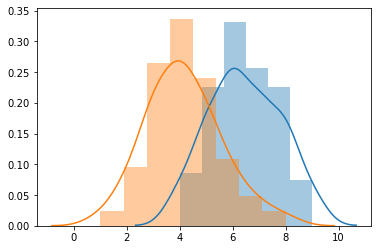

In [23]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]


B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
#B = A

#Ваш код:

print('Размерности выборок:\n') 
print('Выборка А:',len(A))
print('Выборка B:',len(B))    
print('')
significance = 0.05

  
from scipy.stats import ks_2samp
val_sm, pval_sm = ks_2samp(A, B)
print('Тест Колмогорова-Смирнова:')
print('')
print(f'Value = {val_sm:.2f}, pvalue = {pval_sm:.2f}, заданный уровень значимости: {significance:.2f}')

if pval_sm < significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между двумя множествами статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между двумя множествами статистически недостоверны.')
print('')
    
from scipy.stats import mannwhitneyu
print('Тест Манна-Уитни:')
print('')
val_mw, pval_mw = mannwhitneyu(A, B)

print(f'Value = {val_mw:.2f}, pvalue = {pval_mw:.2f}, заданный уровень значимости: {significance:.2f}')

if pval_mw < significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между двумя множествами статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между двумя множествами статистически недостоверны.')

sns.distplot(A)
sns.distplot(B)


<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

### Ваши выводы:
Все зависит от заданного уровня значимости альфа - если он задан на уровне 0.05, то p-value<0.05,следовательно мы отвергаем нулевую гипотезу и принимаем альтернативную распределение не соответствует нормальному закону.
Если нас изначально  альфа положена на уровне 0.01, то ситуация обратная - мы с таким уровнем достоверности не можем отвергнуть нулевую гипотезу.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

Тест Стьюдента для зависимых выборок:

Value = -2.03, pvalue = 0.04, заданный уровень значимости: 0.05
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между двумя множествами статистически достоверны.



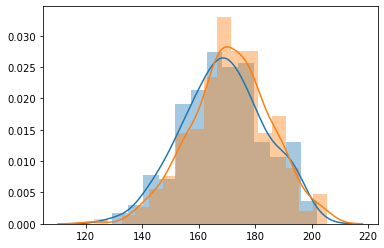

In [26]:
import seaborn as sns

np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:

significance = 0.05
print('Тест Стьюдента для зависимых выборок:')
value, pvalue = stats.ttest_rel(a=A, b=B)
print('')
print(f'Value = {value:.2f}, pvalue = {pvalue:.2f}, заданный уровень значимости: {significance:.2f}')


if pvalue < significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Различия между двумя множествами статистически достоверны.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Различия между двумя множествами статистически недостоверны.')
print('')
    
sns.distplot(A)
sns.distplot(B)
